I have adapted Butterworth filter

In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
import scipy

from scipy import signal

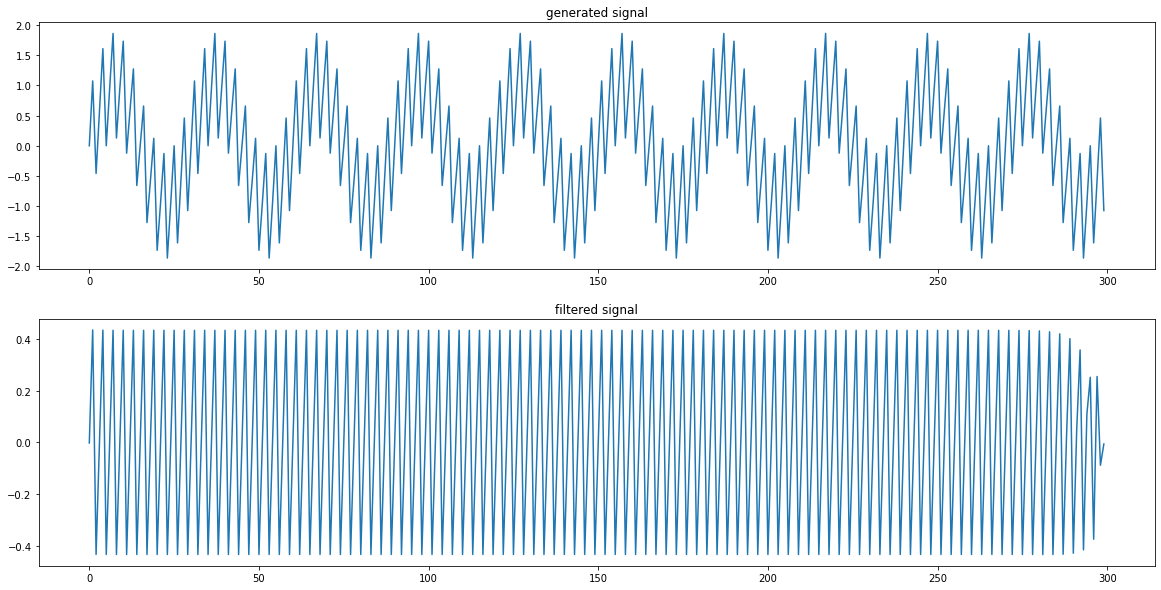

In [3]:
# High pass filter
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
def sine_generator(fs, sinefreq, duration):
    T = duration
    nsamples = fs * T
    w = 2. * np.pi * sinefreq
    t_sine = np.linspace(0, T, nsamples, endpoint=False)
    y_sine = np.sin(w * t_sine)
    result = pd.DataFrame({ 
        'data' : y_sine} ,index=t_sine)
    return result

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

fps = 30
sine_fq = 10 #Hz
duration = 10 #seconds
sine_5Hz = sine_generator(fps,sine_fq,duration)
sine_fq = 1 #Hz
duration = 10 #seconds
sine_1Hz = sine_generator(fps,sine_fq,duration)

sine = sine_5Hz + sine_1Hz

filtered_sine = butter_highpass_filter(sine.data,10,fps)

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(range(len(sine)),sine)
plt.title('generated signal')
plt.subplot(212)
plt.plot(range(len(filtered_sine)),filtered_sine)
plt.title('filtered signal')
plt.show()

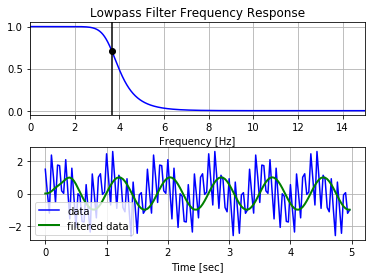

In [4]:
# Low pass filter 
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)


# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

I have used these high and low filters. 

In [5]:
# Load data
Gauge = 'CAS'
Year = '2010'

dataset = '/media/jihwan/DATA/Tide_gauges/jihwan/1min/'+Gauge+'/'+Year+'.nearest.pkl'
df = pd.read_pickle(dataset)

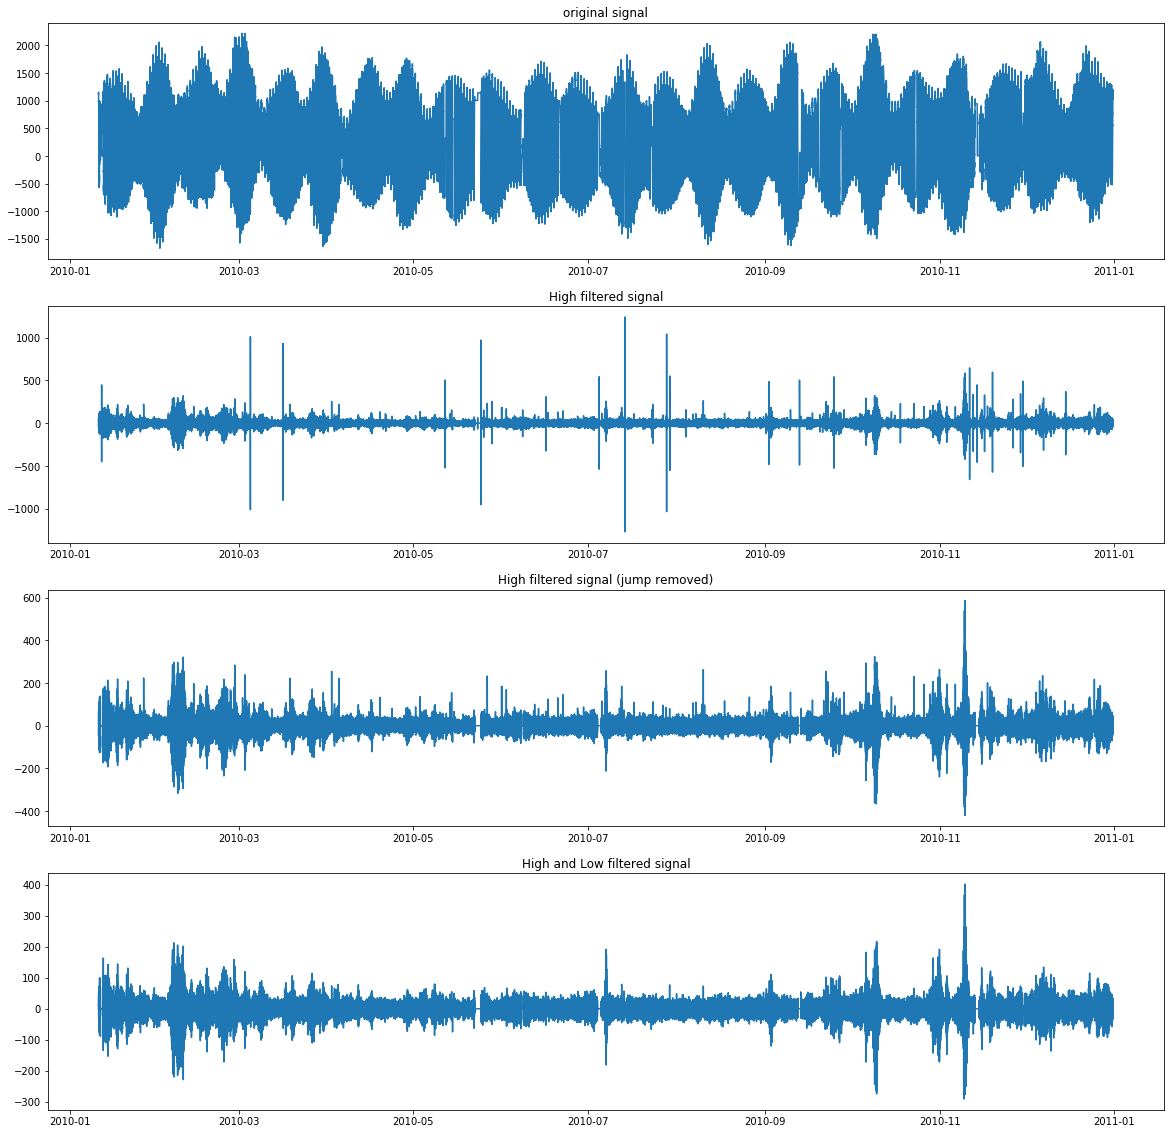

In [6]:
# For our case the unit is hour. 
df1 = df #.loc[60*24*30*10:60*24*30*(10+1)]
order = 2
NN = 60

data = df1['eta']

filtered_data = butter_highpass_filter(data, 0.5, NN, order)

plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(df1['datetime'],data)
plt.title('original signal')
plt.subplot(412)
plt.plot(df1['datetime'],filtered_data)
plt.title('High filtered signal')
plt.subplot(413)

# This may be too restrictive?
val0 = 0.
for i in range(data.shape[0]):
    val = data.iloc[i]
    if val==val0:
        filtered_data[i-2:i+2]=0.
    val0=val
    
plt.plot(df1['datetime'],filtered_data)
plt.title('High filtered signal (jump removed)')

cutoff = 6  

filtered_data = butter_lowpass_filter(filtered_data, cutoff, NN, order)

plt.subplot(414)
plt.plot(df1['datetime'],filtered_data)
plt.title('High and Low filtered signal')
plt.show()